In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from sqlalchemy import create_engine
from config import postgres_pass
from sqlalchemy import create_engine

In [2]:
#creating paths across operating systems
breed_info_path = os.path.join("Resources", "AKC_Breed_Info.csv")
dog_intelligence_path = os.path.join("Resources", "dog_intelligence.csv")

In [3]:
#file encoding is ANSI
breed_info_df = pd.read_csv(breed_info_path, encoding="ANSI")
breed_info_df.head()

,Breed,height_low_inches,height_high_inches,weight_low_lbs,weight_high_lbs
0,Akita,26,28,80,120
1,Anatolian Sheepdog,27,29,100,150
2,Bernese Mountain Dog,23,27,85,110
3,Bloodhound,24,26,80,120
4,Borzoi,26,28,70,100


In [4]:
#file encoding is default UTF-8
dog_intelligence_df = pd.read_csv(dog_intelligence_path)
dog_intelligence_df.head()

,Breed,Classification,obey,reps_lower,reps_upper
0,Border Collie,Brightest Dogs,95%,1,4
1,Poodle,Brightest Dogs,95%,1,4
2,German Shepherd,Brightest Dogs,95%,1,4
3,Golden Retriever,Brightest Dogs,95%,1,4
4,Doberman Pinscher,Brightest Dogs,95%,1,4


In [5]:
dog_intelligence_df.tail()

,Breed,Classification,obey,reps_lower,reps_upper
131,Borzoi,Lowest Degree of Working/Obedience Intelligence,NaN,81,100
132,Chow Chow,Lowest Degree of Working/Obedience Intelligence,NaN,81,100
133,Bulldog,Lowest Degree of Working/Obedience Intelligence,NaN,81,100
134,Basenji,Lowest Degree of Working/Obedience Intelligence,NaN,81,100
135,Afghan Hound,Lowest Degree of Working/Obedience Intelligence,NaN,81,100


In [6]:
dog_intelligence_df.dtypes

Breed             object
Classification    object
obey              object
reps_lower         int64
reps_upper         int64
dtype: object

In [7]:
dog_intelligence_df.count()

Breed             136
Classification    136
obey              125
reps_lower        136
reps_upper        136
dtype: int64

In [8]:
#according to source of dog intelligence data: Lowest Degree of Working/Obedience Intelligence Understanding of new commands: 80 to 100 repetitions or more.
#Obey first command: 25% of the time or worse. -> Updating n/a to 0%
dog_intelligence_df["obey"] = dog_intelligence_df["obey"].fillna("0%")
dog_intelligence_df.tail()

,Breed,Classification,obey,reps_lower,reps_upper
131,Borzoi,Lowest Degree of Working/Obedience Intelligence,0%,81,100
132,Chow Chow,Lowest Degree of Working/Obedience Intelligence,0%,81,100
133,Bulldog,Lowest Degree of Working/Obedience Intelligence,0%,81,100
134,Basenji,Lowest Degree of Working/Obedience Intelligence,0%,81,100
135,Afghan Hound,Lowest Degree of Working/Obedience Intelligence,0%,81,100


In [9]:
dog_intelligence_df["obey"] = dog_intelligence_df["obey"].map(lambda x: x.rstrip("%"))
dog_intelligence_df.head()

,Breed,Classification,obey,reps_lower,reps_upper
0,Border Collie,Brightest Dogs,95,1,4
1,Poodle,Brightest Dogs,95,1,4
2,German Shepherd,Brightest Dogs,95,1,4
3,Golden Retriever,Brightest Dogs,95,1,4
4,Doberman Pinscher,Brightest Dogs,95,1,4


In [10]:
#convert type to float now that % is removed from string
dog_intelligence_df["obey"] = dog_intelligence_df["obey"].astype(float)
dog_intelligence_df.dtypes

Breed              object
Classification     object
obey              float64
reps_lower          int64
reps_upper          int64
dtype: object

In [11]:
#converting to decimal
dog_intelligence_df["obey"] = dog_intelligence_df["obey"].map(lambda x: x/100)
dog_intelligence_df.head()

,Breed,Classification,obey,reps_lower,reps_upper
0,Border Collie,Brightest Dogs,0.95,1,4
1,Poodle,Brightest Dogs,0.95,1,4
2,German Shepherd,Brightest Dogs,0.95,1,4
3,Golden Retriever,Brightest Dogs,0.95,1,4
4,Doberman Pinscher,Brightest Dogs,0.95,1,4


In [12]:
#updated count
dog_intelligence_df.count()

Breed             136
Classification    136
obey              136
reps_lower        136
reps_upper        136
dtype: int64

In [13]:
breed_info_df["Breed"].unique()

array(['Akita', 'Anatolian Sheepdog', 'Bernese Mountain Dog',
       'Bloodhound', 'Borzoi', 'Bullmastiff', 'Great Dane',
       'Great Pyrenees', 'Great Swiss Mountain Dog', 'Irish Wolfhound',
       'Kuvasz', 'Mastiff', 'Neopolitan Mastiff', 'Newfoundland',
       'Otter Hound', 'Rottweiler', 'Saint Bernard', 'Afghan Hound',
       'Alaskan Malamute', 'American Foxhound', 'Beauceron',
       'Belgian Malinois', 'Belgian Sheepdog', 'Belgian Tervuren',
       'Black And Tan Coonhound', 'Black Russian Terrier',
       'Bouvier Des Flandres', 'Boxer', 'Briard',
       'Chesapeake Bay Retriever', 'Clumber Spaniel',
       'Collie (Rough) & (Smooth)', 'Curly Coated Retriever',
       'Doberman Pinscher', 'English Foxhound', 'English Setter',
       'German Shepherd Dog', 'German Shorthaired Pointer',
       'German Wirehaired Pointer', 'Giant Schnauzer', 'Golden Retriever',
       'Gordon Setter', 'Greyhound', 'Irish Setter', 'Komondor',
       'Labrador Retriever', 'Old English Sheepdog (

In [14]:
dog_intelligence_df["Breed"].unique()

array(['Border Collie', 'Poodle', 'German Shepherd', 'Golden Retriever',
       'Doberman Pinscher', 'Shetland Sheepdog', 'Labrador Retriever',
       'Papillon', 'Rottweiler', 'Australian Cattle Dog',
       'Pembroke Welsh Corgi', 'Miniature Schnauzer',
       'English Springer Spaniel', 'Belgian Shepherd Dog (Tervuren)',
       'Schipperke', 'Belgian Sheepdog', 'Collie', 'Keeshond',
       'German Shorthaired Pointer', 'Flat-Coated Retriever',
       'English Cocker Spaniel', 'Standard Schnauzer', 'Brittany',
       'Cocker Spaniel', 'Weimaraner', 'Belgian Malinois',
       'Bernese Mountain Dog', 'Pomeranian', 'Irish Water Spaniel',
       'Vizsla', 'Cardigan Welsh Corgi', 'Chesapeake Bay Retriever',
       'Puli', 'Yorkshire Terrier', 'Giant Schnauzer',
       'Portuguese Water Dog', 'Airedale Terrier', 'Bouvier des Flandres',
       'Border Terrier', 'Briard', 'Welsh Springer Spaniel',
       'Manchester Terrier', 'Samoyed', 'Field Spaniel', 'Newfoundland',
       'Australian Ter

In [15]:
print(breed_info_df.iloc[116, 0])
print(breed_info_df.iloc[115, 0])

Fox Terrier ‰ÛÒ Wirehair
Fox Terrier ‰ÛÒ Smooth


In [16]:
#not on size df:
#Havanese, jack russel, lhasa apso, miniature pinscher, miniature schnauzer, norfolk terrier, norwich terrier, pekingnese, pembroke welsh corgi
breed_info_df["Breed"] = breed_info_df["Breed"].replace({"Airdale Terrier":"Airedale Terrier",
                                                        "Silky Terrier":"Australian Silky Terrier",
                                                        "Bull Dog":"Bulldog",
                                                        "Cocker Spaniel-American": "American Cocker Spaniel",
                                                        "Cocker Spaniel-English":"English Cocker Spaniel",
                                                        "Collie (Rough) & (Smooth)":"Collie",
                                                        "Fox Terrier ‰ÛÒ Wirehair":"Wire Fox Terrier",
                                                        "Fox Terrier ‰ÛÒ Smooth":"Smooth Fox Terrier",
                                                        "German Shepherd Dog":"German Shepherd",
                                                        "Cavalier King Charles Spaniel":"King Charles Spaniel",
                                                        "Old English Sheepdog (Bobtail)":"Old English Sheepdog",
                                                        "Otter Hound":"Otterhound",
                                                        "Shetland Sheepdog (Sheltie)":"Shetland Sheepdog",
                                                        "Manchester Terrier (Standard)":"Manchester Terrier Standard"})
dog_intelligence_df["Breed"] = dog_intelligence_df["Breed"].replace({"Belgian Shepherd Dog (Tervuren)": "Belgian Tervuren",
                                                                    "Cocker Spaniel":"American Cocker Spaniel",
                                                                    "Flat-Coated Retriever":"Flat Coated Retriever",
                                                                    "Fox Terrier (Smooth)":"Smooth Fox Terrier",
                                                                    "Griffon Bruxellois":"Brussels Griffon",
                                                                    "Petit Basset Griffon Vend̩en":"Petit Basset Griffon Vend̩een",
                                                                    "Manchester Terrier":"Manchester Terrier Standard",
                                                                    "Poodle":"Poodle Standard"})

In [17]:
dog_intelligence_df = dog_intelligence_df.set_index("Breed")
dog_intelligence_df.head()

,Classification,obey,reps_lower,reps_upper
Breed,,,,
Border Collie,Brightest Dogs,0.95,1,4
Poodle Standard,Brightest Dogs,0.95,1,4
German Shepherd,Brightest Dogs,0.95,1,4
Golden Retriever,Brightest Dogs,0.95,1,4
Doberman Pinscher,Brightest Dogs,0.95,1,4


In [18]:
#dropping dogs with no sizes
dog_intelligence_df = dog_intelligence_df.drop(["Havanese","Jack Russell terrier", "Lhasa Apso", "Miniature Pinscher", "Miniature Schnauzer", "Norfolk Terrier",
                       "Norwich Terrier", "Pekingese", "Pembroke Welsh Corgi"])
dog_intelligence_df.head()

,Classification,obey,reps_lower,reps_upper
Breed,,,,
Border Collie,Brightest Dogs,0.95,1,4
Poodle Standard,Brightest Dogs,0.95,1,4
German Shepherd,Brightest Dogs,0.95,1,4
Golden Retriever,Brightest Dogs,0.95,1,4
Doberman Pinscher,Brightest Dogs,0.95,1,4


In [19]:
dog_intelligence_df = dog_intelligence_df.reset_index()
dog_intelligence_df.head()

,Breed,Classification,obey,reps_lower,reps_upper
0,Border Collie,Brightest Dogs,0.95,1,4
1,Poodle Standard,Brightest Dogs,0.95,1,4
2,German Shepherd,Brightest Dogs,0.95,1,4
3,Golden Retriever,Brightest Dogs,0.95,1,4
4,Doberman Pinscher,Brightest Dogs,0.95,1,4


In [20]:
breed_info_df.dtypes

Breed                 object
height_low_inches     object
height_high_inches    object
weight_low_lbs        object
weight_high_lbs       object
dtype: object

In [21]:
breed_info_df.count()

Breed                 150
height_low_inches     150
height_high_inches    150
weight_low_lbs        150
weight_high_lbs       150
dtype: int64

In [22]:
breed_info_df["height_low_inches"].value_counts()

10           14
22           12
15            9
23            9
25            8
19            8
20            8
17            8
21            8
13            7
18            7
24            6
12            5
14            5
8             5
26            4
27            4
16            4
9             4
28            3
11            3
7             2
48            1
6             1
not found     1
26.5          1
na            1
32            1
9.5           1
Name: height_low_inches, dtype: int64

In [23]:
#converting column types to numeric(converting non number values (na, not found) to NaN)
breed_info_df["height_low_inches"]=pd.to_numeric(breed_info_df["height_low_inches"], errors="coerce")
breed_info_df["height_high_inches"]=pd.to_numeric(breed_info_df["height_high_inches"], errors="coerce")
breed_info_df["weight_low_lbs"]=pd.to_numeric(breed_info_df["weight_low_lbs"], errors="coerce")
breed_info_df["weight_high_lbs"]=pd.to_numeric(breed_info_df["weight_high_lbs"], errors="coerce")

In [24]:
breed_info_df.dtypes

Breed                  object
height_low_inches     float64
height_high_inches    float64
weight_low_lbs        float64
weight_high_lbs       float64
dtype: object

In [25]:
breed_info_df = breed_info_df.dropna(how="any")

In [26]:
breed_info_df.count()

Breed                 148
height_low_inches     148
height_high_inches    148
weight_low_lbs        148
weight_high_lbs       148
dtype: int64

In [27]:
height_cols = breed_info_df.loc[:, "height_low_inches":"height_high_inches"]
breed_info_df["average_height_inches"] = height_cols.mean(axis=1)
weight_cols = breed_info_df.loc[:, "weight_low_lbs":"weight_high_lbs"]
breed_info_df["average_weight_lbs"] = weight_cols.mean(axis=1)
breed_info_df.head()

,Breed,height_low_inches,height_high_inches,weight_low_lbs,weight_high_lbs,average_height_inches,average_weight_lbs
0,Akita,26.0,28.0,80.0,120.0,27.0,100.0
1,Anatolian Sheepdog,27.0,29.0,100.0,150.0,28.0,125.0
2,Bernese Mountain Dog,23.0,27.0,85.0,110.0,25.0,97.5
3,Bloodhound,24.0,26.0,80.0,120.0,25.0,100.0
4,Borzoi,26.0,28.0,70.0,100.0,27.0,85.0


In [28]:
breed_info_df = breed_info_df.rename(columns={"Breed":"breed"})
breed_info_df.head()

,breed,height_low_inches,height_high_inches,weight_low_lbs,weight_high_lbs,average_height_inches,average_weight_lbs
0,Akita,26.0,28.0,80.0,120.0,27.0,100.0
1,Anatolian Sheepdog,27.0,29.0,100.0,150.0,28.0,125.0
2,Bernese Mountain Dog,23.0,27.0,85.0,110.0,25.0,97.5
3,Bloodhound,24.0,26.0,80.0,120.0,25.0,100.0
4,Borzoi,26.0,28.0,70.0,100.0,27.0,85.0


In [29]:
dog_intelligence_df = dog_intelligence_df.rename(columns={"Breed":"breed", "Classification":"classification"})
dog_intelligence_df.head()

,breed,classification,obey,reps_lower,reps_upper
0,Border Collie,Brightest Dogs,0.95,1,4
1,Poodle Standard,Brightest Dogs,0.95,1,4
2,German Shepherd,Brightest Dogs,0.95,1,4
3,Golden Retriever,Brightest Dogs,0.95,1,4
4,Doberman Pinscher,Brightest Dogs,0.95,1,4


In [30]:
rds_connection_string = f'postgres:{postgres_pass}@localhost:5432/postgres'
engine = create_engine(f'postgresql://{rds_connection_string}')

In [31]:
# engine.table_names()

In [32]:
breed_info_df.to_sql(name="breed_info", con=engine, if_exists="replace", index=False)
dog_intelligence_df.to_sql(name="dog_intelligence", con=engine, if_exists="replace", index=False)

In [33]:
#confirm data has been read
pd.read_sql_query("select * from breed_info", con=engine).head()

,breed,height_low_inches,height_high_inches,weight_low_lbs,weight_high_lbs,average_height_inches,average_weight_lbs
0,Akita,26.0,28.0,80.0,120.0,27.0,100.0
1,Anatolian Sheepdog,27.0,29.0,100.0,150.0,28.0,125.0
2,Bernese Mountain Dog,23.0,27.0,85.0,110.0,25.0,97.5
3,Bloodhound,24.0,26.0,80.0,120.0,25.0,100.0
4,Borzoi,26.0,28.0,70.0,100.0,27.0,85.0


In [34]:
#confirm data has been read
pd.read_sql_query("select * from dog_intelligence", con=engine).head()

,breed,classification,obey,reps_lower,reps_upper
0,Border Collie,Brightest Dogs,0.95,1,4
1,Poodle Standard,Brightest Dogs,0.95,1,4
2,German Shepherd,Brightest Dogs,0.95,1,4
3,Golden Retriever,Brightest Dogs,0.95,1,4
4,Doberman Pinscher,Brightest Dogs,0.95,1,4


In [35]:
#perform sql join
dog_data = ('SELECT breed_info.breed, breed_info.average_height_inches, ' 
            'breed_info.average_weight_lbs, dog_intelligence.classification, ' 
            'dog_intelligence.obey, dog_intelligence.reps_lower, dog_intelligence.reps_upper '
            'FROM breed_info '
            'INNER JOIN dog_intelligence ON breed_info.breed = dog_intelligence.breed')

dog_data_df = pd.read_sql_query(dog_data, con=engine)
dog_data_df

,breed,average_height_inches,average_weight_lbs,classification,obey,reps_lower,reps_upper
0,Akita,27.0,100.0,Average Working/Obedience Intelligence,0.50,26,40
1,Bernese Mountain Dog,25.0,97.5,Excellent Working Dogs,0.85,5,15
2,Bloodhound,25.0,100.0,Lowest Degree of Working/Obedience Intelligence,0.00,81,100
3,Borzoi,27.0,85.0,Lowest Degree of Working/Obedience Intelligence,0.00,81,100
4,Bullmastiff,26.0,115.0,Fair Working/Obedience Intelligence,0.30,41,80
...,...,...,...,...,...,...,...
116,Japanese Chin,9.5,7.5,Fair Working/Obedience Intelligence,0.30,41,80
117,Maltese,9.0,5.0,Fair Working/Obedience Intelligence,0.30,41,80
118,Papillon,9.5,7.5,Brightest Dogs,0.95,1,4
119,Pomeranian,12.0,5.0,Excellent Working Dogs,0.85,5,15


In [36]:
#added combined table to sql database
dog_data_df.to_sql(name="size_and_intelligence", con=engine, if_exists="replace", index=False)

In [37]:
#export dataset to csv
complete_dog_data = pd.read_sql_query(dog_data, con=engine)
file_path = os.path.join('Resources', 'complete_dog_data.csv')
complete_dog_data.to_csv(file_path, index=False)

In [38]:
#addressed research questions
# Small dogs < 35 lbs
# Medium breeds - between 35 and 65 lbs
# Large dogs > 65 lbs

# What are the top 5 smartest large dog breeds?
top_large_dogs = ('SELECT breed, average_weight_lbs, classification, ' 
                'obey, reps_lower, reps_upper '
                'FROM size_and_intelligence '
                'WHERE average_weight_lbs > 65 '
                'ORDER BY obey DESC '
                'LIMIT 5')

top_large_dogs_df = pd.read_sql_query(top_large_dogs, con=engine)
top_large_dogs_df 

,breed,average_weight_lbs,classification,obey,reps_lower,reps_upper
0,German Shepherd,82.5,Brightest Dogs,0.95,1,4
1,Labrador Retriever,67.5,Brightest Dogs,0.95,1,4
2,Doberman Pinscher,80.0,Brightest Dogs,0.95,1,4
3,Rottweiler,100.0,Brightest Dogs,0.95,1,4
4,Belgian Sheepdog,67.5,Excellent Working Dogs,0.85,5,15


In [39]:
# What are the top 5 smartest small dog breeds?
top_small_dogs = ('SELECT breed, average_weight_lbs, classification, ' 
                'obey, reps_lower, reps_upper '
                'FROM size_and_intelligence '
                'WHERE average_weight_lbs < 35 '
                'ORDER BY obey DESC '
                'LIMIT 5')

top_small_dogs_df = pd.read_sql_query(top_large_dogs, con=engine)
top_small_dogs_df

,breed,average_weight_lbs,classification,obey,reps_lower,reps_upper
0,German Shepherd,82.5,Brightest Dogs,0.95,1,4
1,Labrador Retriever,67.5,Brightest Dogs,0.95,1,4
2,Doberman Pinscher,80.0,Brightest Dogs,0.95,1,4
3,Rottweiler,100.0,Brightest Dogs,0.95,1,4
4,Belgian Sheepdog,67.5,Excellent Working Dogs,0.85,5,15


In [40]:
# What are the top ten dogs breeds by intelligence?
top_dogs = ('SELECT breed, average_weight_lbs, classification, ' 
                'obey, reps_lower, reps_upper '
                'FROM size_and_intelligence '
                'ORDER BY obey DESC '
                'LIMIT 10')

top_dogs_df = pd.read_sql_query(top_dogs, con=engine)
top_dogs_df

,breed,average_weight_lbs,classification,obey,reps_lower,reps_upper
0,Border Collie,40.0,Brightest Dogs,0.95,1,4
1,Shetland Sheepdog,17.0,Brightest Dogs,0.95,1,4
2,Labrador Retriever,67.5,Brightest Dogs,0.95,1,4
3,Australian Cattle Dog,40.0,Brightest Dogs,0.95,1,4
4,Doberman Pinscher,80.0,Brightest Dogs,0.95,1,4
5,German Shepherd,82.5,Brightest Dogs,0.95,1,4
6,Golden Retriever,65.0,Brightest Dogs,0.95,1,4
7,Rottweiler,100.0,Brightest Dogs,0.95,1,4
8,Poodle Standard,45.0,Brightest Dogs,0.95,1,4
9,Papillon,7.5,Brightest Dogs,0.95,1,4


In [41]:
# What is the average intelligence across all breeds based on dog weight?
# Small dogs < 35 lbs
# Medium breeds - between 35 and 65 lbs
# Large dogs > 65 lbs

avg_small_dog_int = ('SELECT COUNT(breed) AS "dog count", AVG(obey) AS "average obediance", '
                     'AVG(reps_lower) AS "average low reps", '
                     'AVG(reps_upper) AS "average upper reps" ' 
                     'FROM size_and_intelligence '
                     'WHERE average_weight_lbs < 35')

avg_medium_dog_int = ('SELECT COUNT(breed) AS "dog count", AVG(obey) AS "average obediance", '
                     'AVG(reps_lower) AS "average low reps", '
                     'AVG(reps_upper) AS "average upper reps" '  
                    'FROM size_and_intelligence '
                    'WHERE average_weight_lbs > 35 AND average_weight_lbs < 65')


avg_large_dog_int = ('SELECT COUNT(breed) AS "dog count", AVG(obey) AS "average obediance", '
                     'AVG(reps_lower) AS "average low reps", '
                     'AVG(reps_upper) AS "average upper reps" ' 
                    'FROM size_and_intelligence '
                    'WHERE average_weight_lbs > 65')

#create data frames
avg_small_dog_int_df = pd.read_sql_query(avg_small_dog_int, con=engine)
avg_medium_dog_int_df = pd.read_sql_query(avg_medium_dog_int , con=engine)
avg_large_dog_int_df =pd.read_sql_query(avg_large_dog_int , con=engine)

#add dog size to data frame
avg_small_dog_int_df['dog size'] = 'Small Dogs'
avg_medium_dog_int_df['dog size'] = 'Medium Dogs'
avg_large_dog_int_df['dog size'] = 'Large Dogs'

#merge dataframes
columns = ['dog size','dog count', 'average obediance', 'average low reps', 'average upper reps']
dog_data = avg_small_dog_int_df.merge(avg_medium_dog_int_df, on=columns, how='outer')
avg_dog_data = dog_data.merge(avg_large_dog_int_df, on=columns, how='outer')
avg_dog_data

#reorder
avg_dog_data = avg_dog_data[columns]
avg_dog_data

,dog size,dog count,average obediance,average low reps,average upper reps
0,Small Dogs,49,0.513265,28.000000,47.612245
1,Medium Dogs,35,0.600000,24.000000,36.485714
2,Large Dogs,28,0.560714,25.857143,40.392857


In [42]:
#export dataset to html
complete_dog_data.to_html("data.html", classes=["table", "table-bordered", "table-striped", "table-hover"], index=False) 

In [101]:
#chart functions
#scatter plot function for x vs obedience comparison
color = '#9A5A43'
def x_vs_ob_scatter(x, o_ratio, x_title, x_label, dog_group):
    plt.figure(figsize=(8,4))
    ax = plt.axes()
    # Setting the background color
#     ax.set_facecolor("lightgrey")
    plt.scatter(x, o_ratio,
            alpha=0.85,
            c=color)
    title = f'Relationship between Dog {x_title} \nand Obedience - {dog_group}'
    plt.title(title, fontsize=12)
    plt.xlabel(f'{x_label}')
    plt.ylabel('Obedience')
    plt.savefig(f'images/Relationship between Dog {x_title} and Obedience - {dog_group}.png' )
    plt.show()

#scatter plot function for weight, height, and obedience comparison
def tri_factor_scatter(weight, height, o_ratio, dog_group):
    plt.figure(figsize=(8,4))
    ax = plt.axes()
    # Setting the background color
#     ax.set_facecolor("lightgrey")
    plt.scatter(weight, 
                height, 
                c=o_ratio,
                alpha=0.90,
                cmap=plt.cm.copper)
    title= f'Relationship between Dog Weight, Height, \nand Obedience - {dog_group}'
    plt.title(title, fontsize=12)
    plt.xlabel('Weight (lb)')
    plt.ylabel('Height (in)')
    plt.colorbar(orientation='vertical', shrink=.9, label='Obedience Ratio')
    plt.savefig( f'images/Relationship between Dog Weight, Height, and Obedience - {dog_group}.png')
    plt.show()
    
#weight histogram function
def weight_hist(x, bin_count, dog_group):
    ax = plt.axes()
    # Setting the background color
#     ax.set_facecolor("lightgrey")
    plt.hist(x, bins=bin_count, color=color)
    title = f'Dog Average Weight Distribution Histogram - {dog_group}'
    plt.title(title)
    plt.xlabel('Weight (lb)')
    plt.ylabel('Count')
    plt.savefig(f'images/{title}.png')
    plt.show()

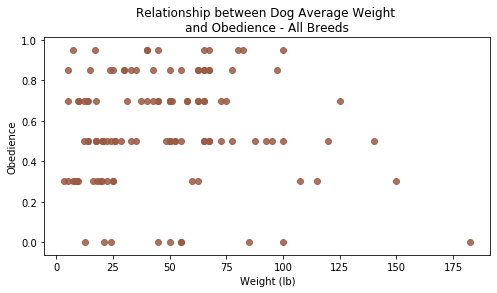

In [102]:
# all breeds - weight vs obedience
x = complete_dog_data['average_weight_lbs']
o_ratio  = complete_dog_data['obey']
x_title = 'Average Weight'
x_label = 'Weight (lb)'
dog_group = 'All Breeds'

x_vs_ob_scatter(x, o_ratio, x_title, x_label, dog_group)

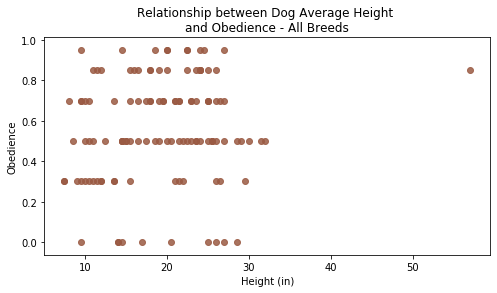

In [103]:
# all breeds - height vs obedience
x = complete_dog_data['average_height_inches']
o_ratio  = complete_dog_data['obey']
x_title = 'Average Height'
x_label = 'Height (in)'
dog_group = 'All Breeds'

x_vs_ob_scatter(x, o_ratio, x_title, x_label, dog_group)

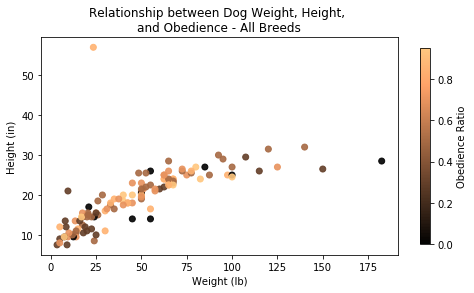

In [104]:
#scatter plot comparing all dog weights, heights and obedience levels
x = complete_dog_data['average_weight_lbs']
y = complete_dog_data['average_height_inches']
o_ratio  = complete_dog_data['obey']

tri_factor_scatter(x, y, o_ratio, 'All Breeds')

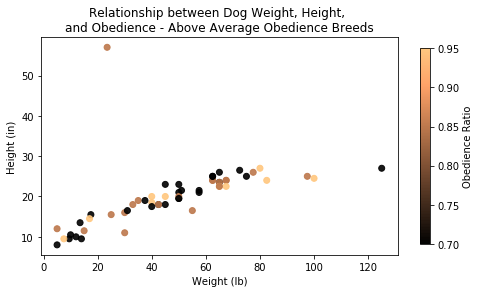

In [105]:
#scatter plot comparing high obedience dog weights and heights
above_average_dogs = complete_dog_data.loc[complete_dog_data['obey'] >= .70 ]

#scatter plot comparing breeds with above average obedience levels (as the sizing factor)
x = above_average_dogs['average_weight_lbs']
y = above_average_dogs['average_height_inches']
o_ratio  = above_average_dogs['obey']

tri_factor_scatter(x, y, o_ratio, 'Above Average Obedience Breeds')

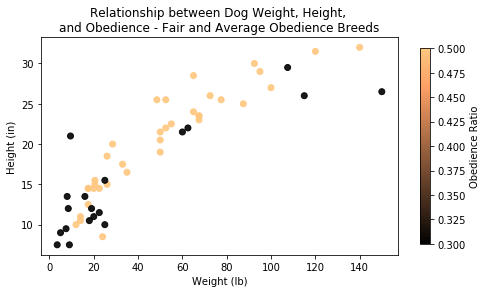

In [106]:
#scatter plot comparing average/fair obedience dog weights and heights
fair_and_average_dogs = complete_dog_data.loc[(complete_dog_data['obey'] >= .30) 
                                              & (complete_dog_data['obey'] <=.50)]

#scatter plot comparing breeds with above average obedience levels (as the sizing factor)
x = fair_and_average_dogs['average_weight_lbs']
y = fair_and_average_dogs['average_height_inches']
o_ratio  = fair_and_average_dogs['obey']

tri_factor_scatter(x, y, o_ratio, 'Fair and Average Obedience Breeds')

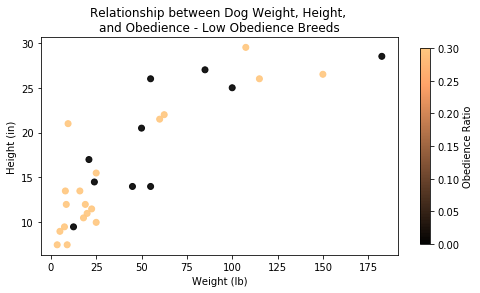

In [107]:
lowest_dog_int = complete_dog_data.loc[complete_dog_data['obey'] <= .30]

x = lowest_dog_int['average_weight_lbs']
y = lowest_dog_int['average_height_inches']
o_ratio  = lowest_dog_int['obey']

tri_factor_scatter(x, y, o_ratio, 'Low Obedience Breeds')

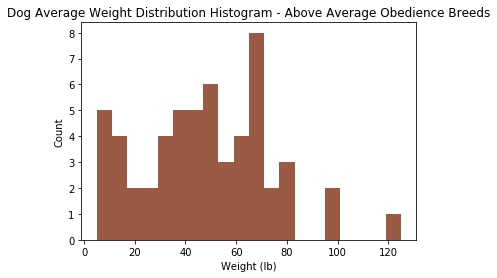

In [108]:
#histogram plot comparing above average obediance dog weights
x = above_average_dogs['average_weight_lbs']
bin_count = 20

weight_hist(x, bin_count, 'Above Average Obedience Breeds')

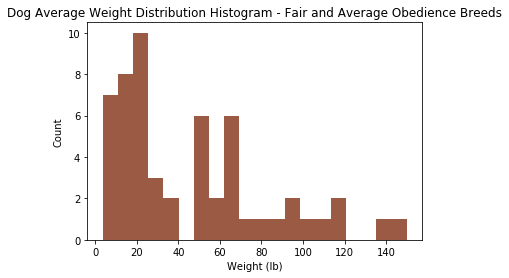

In [109]:
#histogram plot comparing average/fair obedience dog weights
x = fair_and_average_dogs['average_weight_lbs']
bin_count = 20

weight_hist(x, bin_count, 'Fair and Average Obedience Breeds')

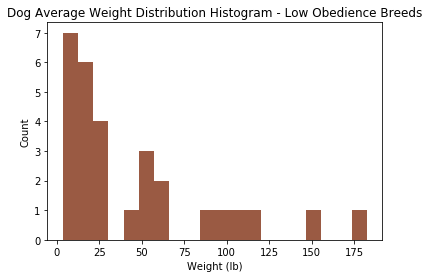

In [110]:
#histogram plot comparing average/fair obedience dog weights
x = lowest_dog_int['average_weight_lbs']
bin_count = 20

weight_hist(x, bin_count, 'Low Obedience Breeds')